In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
plt.style.use('dark_background')

In [6]:
df = pd.read_csv('/content/Cricket.csv', encoding='latin1')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [7]:
# Player -> Name
# Span -> The time they have played
# Mat -> No. of matches
# Inns -> Innings
# NO -> Not Out
# Runs -> No. of runs
# HS -> High Score
# Ave -> Average
# BF -> Balls faced
# SR -> Strike rate
# 100 -> No. of centuries
# 50 -> No. of half-centuries
# 0 -> ducks

In [8]:
df.shape

(79, 13)

In [9]:
df['Player'].nunique()

79

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [11]:
df[['From', 'To']] = df['Span'].str.split('-', expand=True)

In [12]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,From,To
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  From    79 non-null     object 
 14  To      79 non-null     object 
dtypes: float64(2), int64(8), object(5)
memory usage: 9.4+ KB


In [15]:
# Here we can see that still 'from', 'To' columns are in object data type.
# So lets convert them into a numeric dtype.

In [16]:
df[['From', 'To']] = df[['From', 'To']].astype('int')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  From    79 non-null     int64  
 14  To      79 non-null     int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 9.4+ KB


In [18]:
df['experience'] = df['To'] - df['From']

In [19]:
df.head(1)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,From,To,experience
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23


In [20]:
# Now since we have got the experience that each player has, span, from and to are unnecessary columns. SO lets drop them

In [22]:
df = df.drop(['Span', 'From', 'To'], axis = 1)

In [23]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [24]:
df[['HS', 'extra']] = df.HS.str.split('*', expand = True)

In [25]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience,extra
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,None
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,None
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,None
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,None


In [26]:
df = df.drop('extra', axis = 1)

In [27]:
df.head(1)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      79 non-null     object 
 1   Mat         79 non-null     int64  
 2   Inns        79 non-null     int64  
 3   NO          79 non-null     int64  
 4   Runs        79 non-null     int64  
 5   HS          79 non-null     object 
 6   Ave         79 non-null     float64
 7   BF          79 non-null     int64  
 8   SR          79 non-null     float64
 9   100         79 non-null     int64  
 10  50          79 non-null     int64  
 11  0           79 non-null     int64  
 12  experience  79 non-null     int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 8.1+ KB


In [29]:
# Still column 'HS' is in object dtype. So lets convert it into numeric dtype

In [30]:
df['HS'] = pd.to_numeric(df['HS'], errors='coerce')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      79 non-null     object 
 1   Mat         79 non-null     int64  
 2   Inns        79 non-null     int64  
 3   NO          79 non-null     int64  
 4   Runs        79 non-null     int64  
 5   HS          79 non-null     int64  
 6   Ave         79 non-null     float64
 7   BF          79 non-null     int64  
 8   SR          79 non-null     float64
 9   100         79 non-null     int64  
 10  50          79 non-null     int64  
 11  0           79 non-null     int64  
 12  experience  79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


In [32]:
df.isna().sum()

,0
Player,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Ave,0
BF,0
SR,0
100,0


In [33]:
df.duplicated().sum()

0

In [34]:
# OR
df[df.duplicated()].sum()

,0
Player,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Ave,0.0
BF,0
SR,0.0
100,0


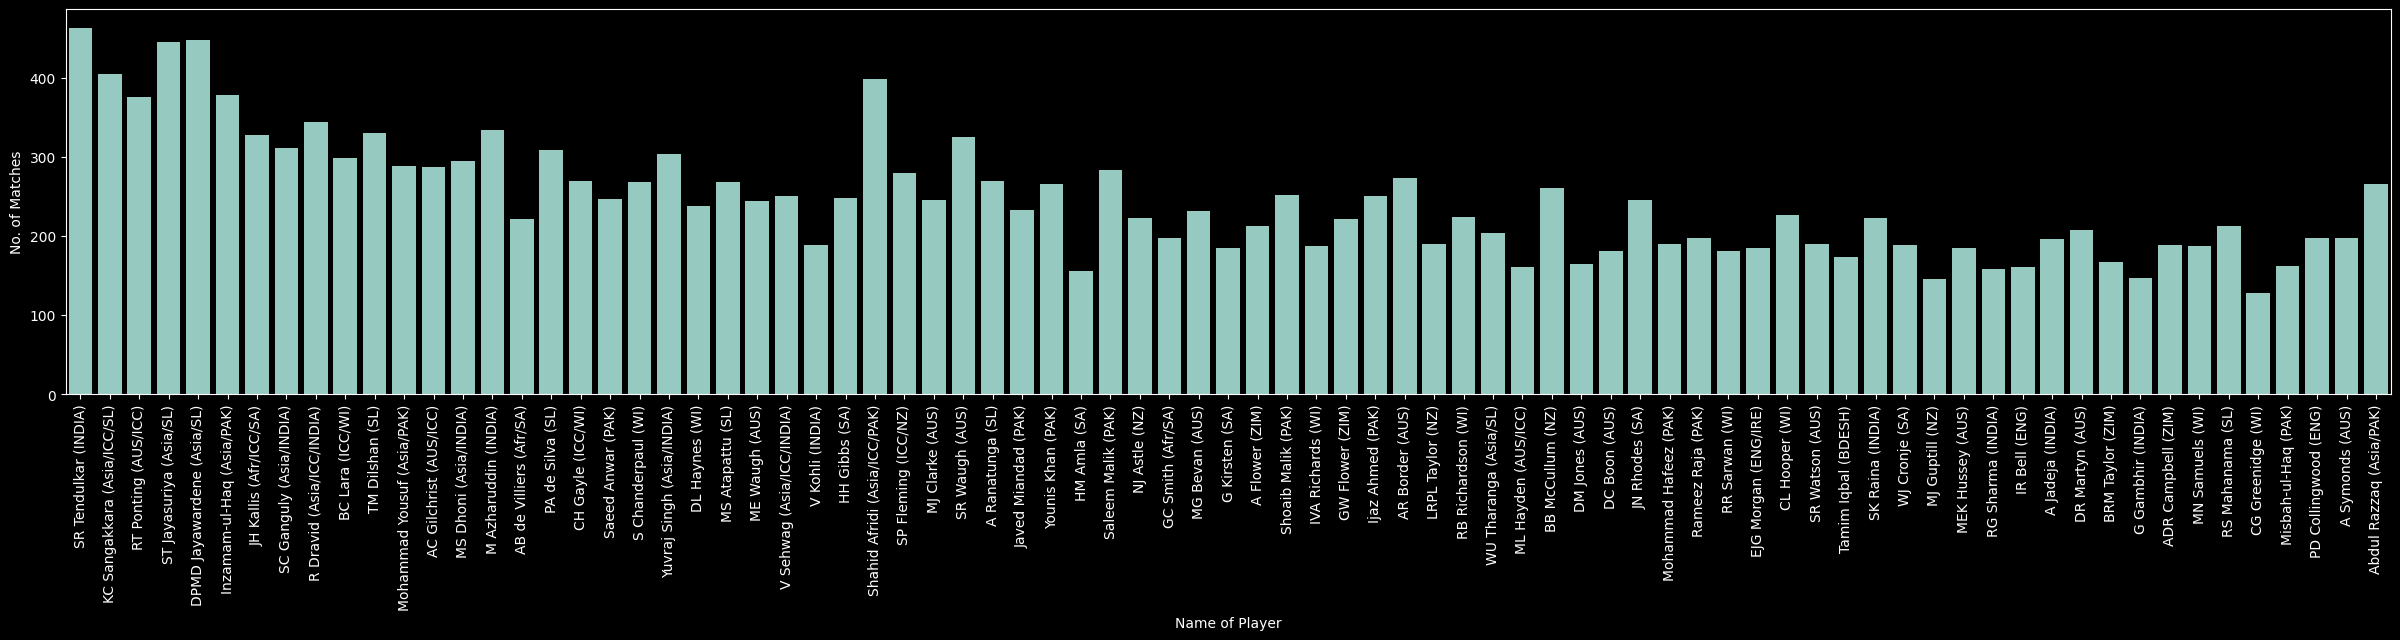

In [35]:
plt.figure(figsize = (30, 5))
mat = df[['Player', 'Mat']]
ax = sns.barplot(x = 'Player', y = 'Mat', data = mat)
ax.set(xlabel = 'Name of Player', ylabel = 'No. of Matches')
plt.xticks(rotation = 90)
plt.show()

In [36]:
# Here in the graph above, it is difficult understand that which playes has played highest matches
# So we can do the following change in the code

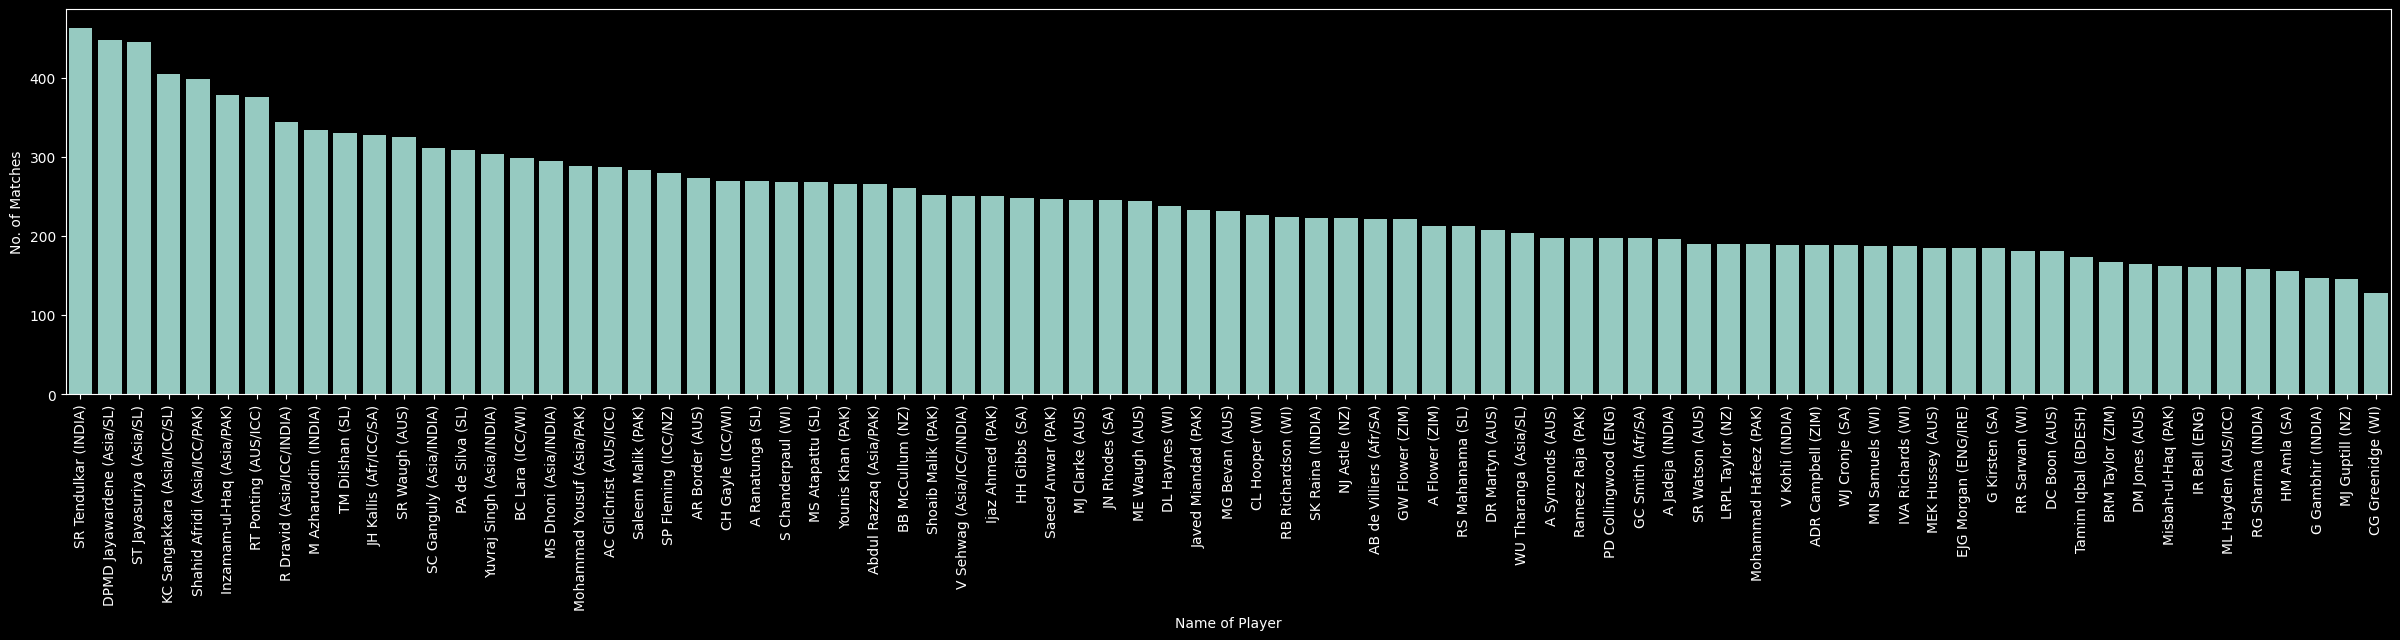

In [37]:
plt.figure(figsize = (30, 5))
mat = df[['Player', 'Mat']].sort_values(by = 'Mat', ascending = False)
ax = sns.barplot(x = 'Player', y = 'Mat', data = mat)
ax.set(xlabel = 'Name of Player', ylabel = 'No. of Matches')
plt.xticks(rotation = 90)
plt.show()

In [38]:
# If we want the graph of only top 10 players, then we can do the following change in the code

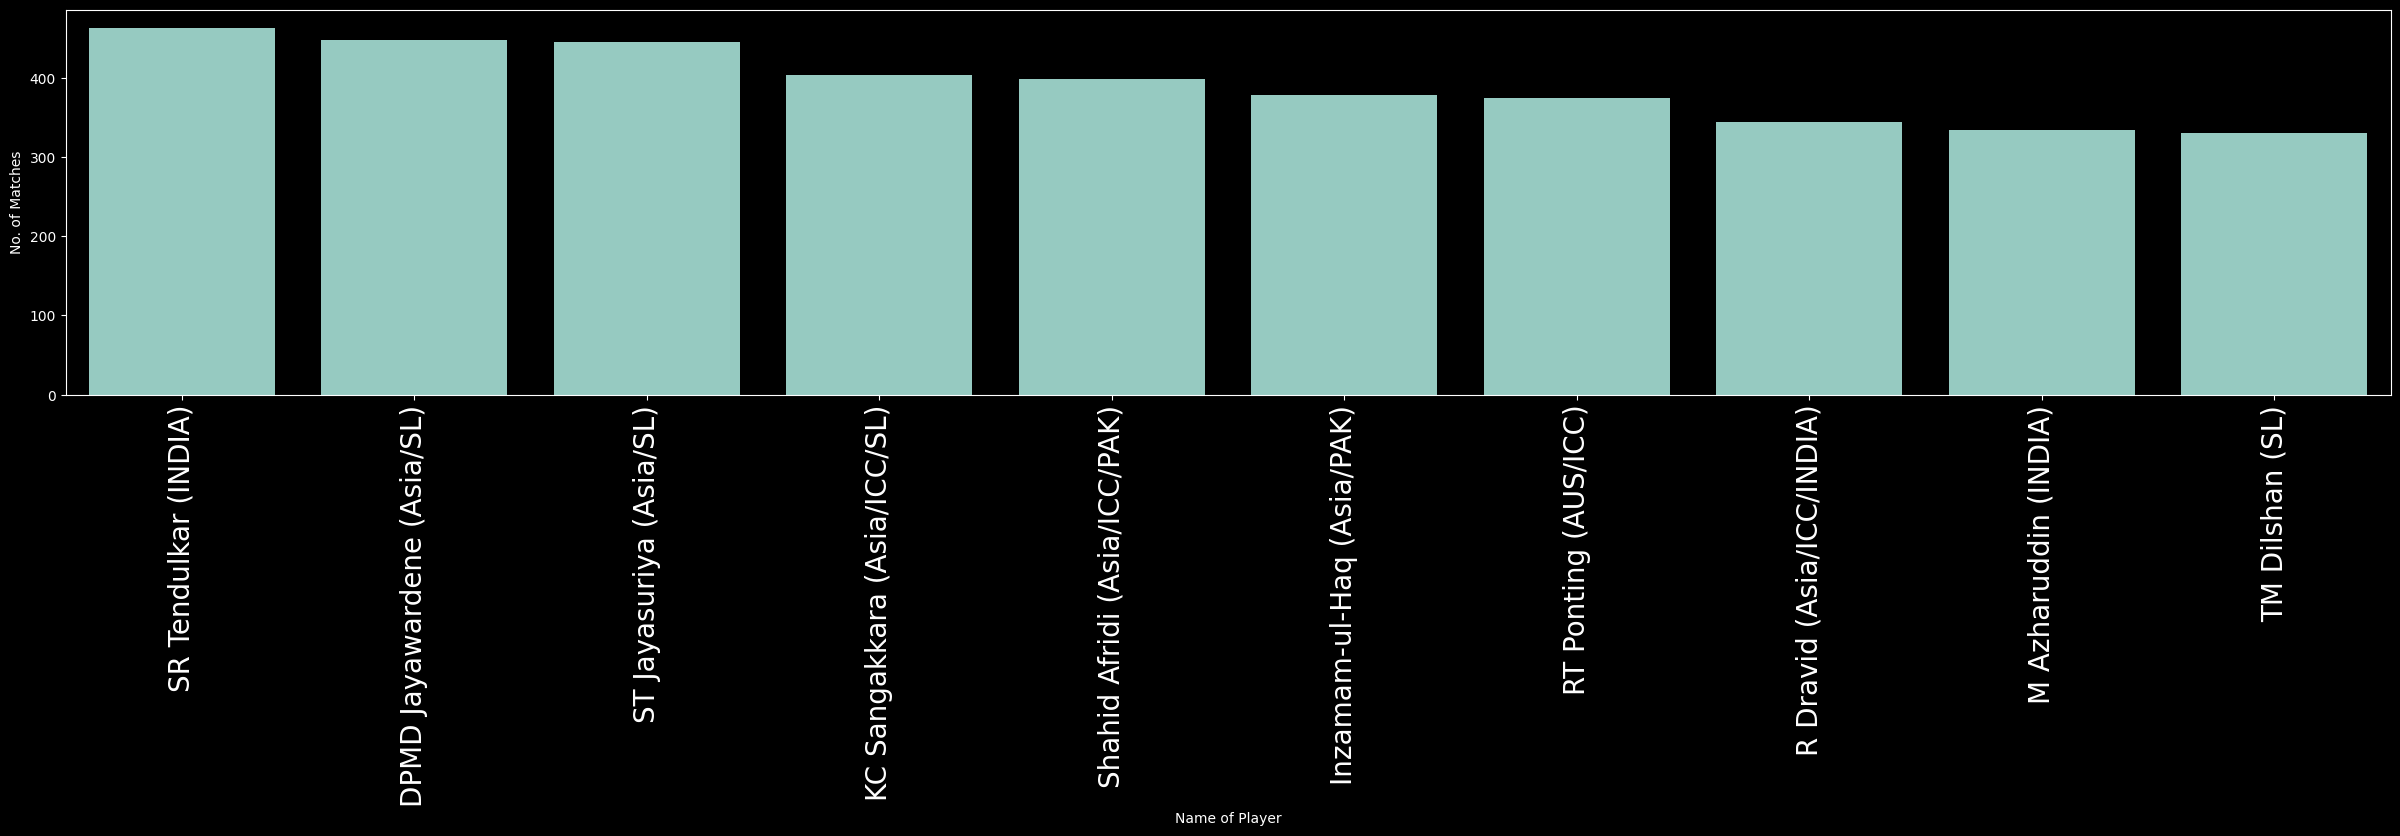

In [39]:
plt.figure(figsize = (30, 5))
mat = df[['Player', 'Mat']].sort_values(by = 'Mat', ascending = False).head(10)
ax = sns.barplot(x = 'Player', y = 'Mat', data = mat)
ax.set(xlabel = 'Name of Player', ylabel = 'No. of Matches')
plt.xticks(rotation = 90, fontsize = 20)
plt.show()

In [41]:
df.corr()

ValueError: could not convert string to float: 'SR Tendulkar\xa0(INDIA)'

In [42]:
# Here we are getting error because column 'Playes' is in Object dtype.
# So lets drop it temporarily.

In [43]:
a = df.drop('Player', axis = 1)

In [44]:
a.corr()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
Mat,1.000000,0.990661,0.433992,0.864500,0.089757,-0.204473,0.798576,0.183694,0.466574,0.777884,0.673924,0.687774
Inns,0.990661,1.000000,0.338788,0.896270,0.137518,-0.210776,0.838206,0.152891,0.530225,0.800381,0.697878,0.698699
NO,0.433992,0.338788,1.000000,0.260526,-0.312561,0.241971,0.275283,-0.019291,-0.121577,0.350533,-0.101977,0.233812
Runs,0.864500,0.896270,0.260526,1.000000,0.335049,0.172331,0.936736,0.146401,0.776243,0.914436,0.497139,0.589688
HS,0.089757,0.137518,-0.312561,0.335049,1.000000,0.250068,0.192006,0.388540,0.568856,0.180646,0.222399,0.051748
Ave,-0.204473,-0.210776,0.241971,0.172331,0.250068,1.000000,0.132089,0.098574,0.345500,0.240353,-0.536602,-0.238810
BF,0.798576,0.838206,0.275283,0.936736,0.192006,0.132089,1.000000,-0.196835,0.658980,0.933328,0.402524,0.584006
SR,0.183694,0.152891,-0.019291,0.146401,0.388540,0.098574,-0.196835,1.000000,0.257617,-0.047072,0.271291,0.000201
100,0.466574,0.530225,-0.121577,0.776243,0.568856,0.345500,0.658980,0.257617,1.000000,0.557369,0.338982,0.338881
50,0.777884,0.800381,0.350533,0.914436,0.180646,0.240353,0.933328,-0.047072,0.557369,1.000000,0.357128,0.505346


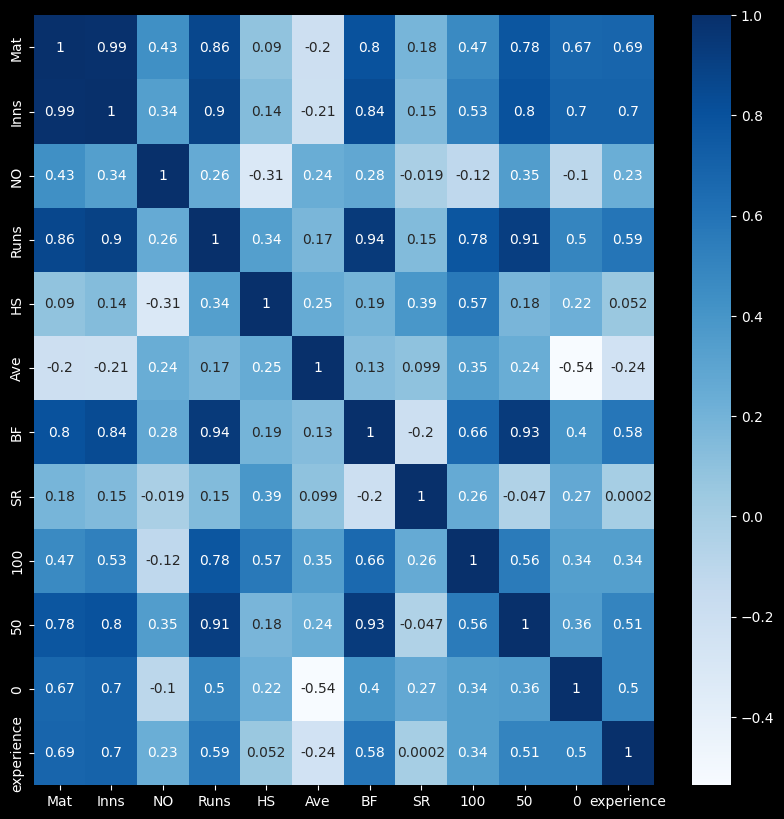

In [45]:
plt.figure(figsize = (10, 10))
sns.heatmap(a.corr(), annot = True, cmap = 'Blues')
plt.show()

In [46]:
# The darker the colour the more is the correlation

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sa = StandardScaler()

In [49]:
df_scaled = sa.fit_transform(a)

In [50]:
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [51]:
df_scaled.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [52]:
# Here we are getting an error because df_scaled is an array. So at first we need to convert it into data frame.

In [53]:
a.columns

Index(['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0',
       'experience'],
      dtype='object')

In [54]:
d = pd.DataFrame(df_scaled, columns = ['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0', 'experience'])

In [55]:
d.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900


In [56]:
from sklearn.cluster import *
from sklearn.metrics import *

In [57]:
cluster=KMeans()
cluster.fit(a)
cluster.labels_

array([5, 2, 2, 7, 7, 7, 7, 7, 7, 4, 4, 4, 6, 6, 4, 6, 6, 6, 6, 4, 6, 4,
       4, 6, 3, 0, 0, 3, 6, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0,
       3, 0, 3, 0, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1], dtype=int32)

In [58]:
# I dont know the value of k
# the values will range from 2 - 14
# giving range in the form of list
c=list(range(2,15))
# empty list
ssd=[]
# looping as we have many k values
for num_clusters in c:
  # building my model
  m=KMeans(n_clusters=num_clusters,max_iter=150,random_state=50)
  # training model
  m.fit(d)
  # appending the data to my empty list
  ssd.append(m.inertia_)

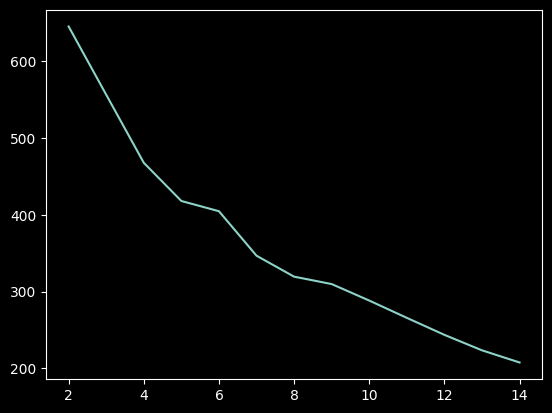

In [59]:
plt.plot(c,ssd)
# plotting the graph

In [60]:
c=list(range(2,15))

for num_clusters in c:
  m=KMeans(n_clusters=num_clusters,max_iter=150,random_state=50)
  m.fit(d)
# getting all the cluster labels
  cluster_l=m.labels_
  # calculating score
  s=silhouette_score(d,cluster_l)
  # printng
  print(f"for n_clusters: {num_clusters} the score is: {s}")

for n_clusters: 2 the score is: 0.3091574447649467
for n_clusters: 3 the score is: 0.17956656102666751
for n_clusters: 4 the score is: 0.18435941265484881
for n_clusters: 5 the score is: 0.18092775301914105
for n_clusters: 6 the score is: 0.14374339904570071
for n_clusters: 7 the score is: 0.17421444633075947
for n_clusters: 8 the score is: 0.16138674005905135
for n_clusters: 9 the score is: 0.13469835297607244
for n_clusters: 10 the score is: 0.14304079696744204
for n_clusters: 11 the score is: 0.1703519099099622
for n_clusters: 12 the score is: 0.17188369638043793
for n_clusters: 13 the score is: 0.17461601469964827
for n_clusters: 14 the score is: 0.1691287216369505


In [61]:
clusters=KMeans(n_clusters=3, max_iter=150,random_state=80)
clusters.fit(d)

KMeans(max_iter=150, n_clusters=3, random_state=80)

In [62]:
pred=clusters.predict(d)

In [63]:
clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

In [64]:
df['clusters']=clusters.labels_

In [65]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience,clusters
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,1
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,1
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,1
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,1
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,1


In [66]:
df['clusters'].value_counts()

,count
clusters,
2,39
0,31
1,9


In [67]:
x=d.iloc[:,[3,6]].values

In [68]:
kmeans=clusters.fit_predict(x)

In [69]:
kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

<Axes: >

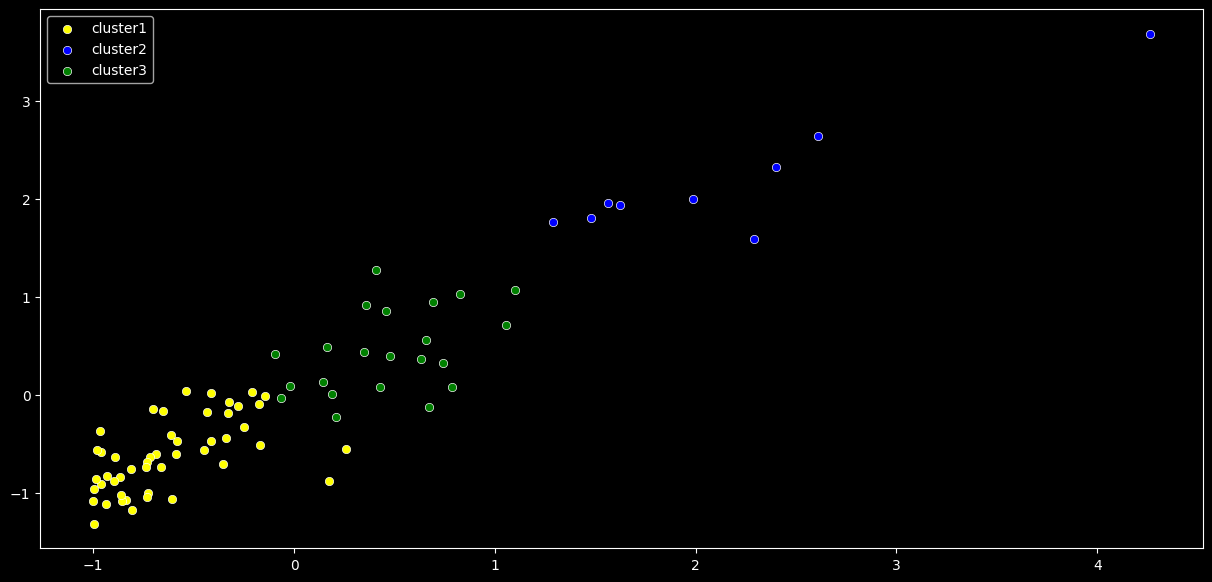

In [70]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=x[kmeans==0,0],y=x[kmeans==0,1], color='yellow',label='cluster1')
sns.scatterplot(x=x[kmeans==1,0],y=x[kmeans==1,1], color='blue',label='cluster2')
sns.scatterplot(x=x[kmeans==2,0],y=x[kmeans==2,1], color='green',label='cluster3')

In [71]:
x[kmeans==0,0]

array([ 0.25825938,  0.17583543, -0.14557854, -0.17042403, -0.176734  ,
       -0.20828384, -0.24811551, -0.27848223, -0.32344074, -0.32817322,
       -0.33645505, -0.35380746, -0.41296341, -0.41572402, -0.43149894,
       -0.44648511, -0.54034587, -0.58293815, -0.58569876, -0.60541741,
       -0.61133301, -0.65234779, -0.66378461, -0.68705262, -0.70085567,
       -0.71544747, -0.7280674 , -0.73240551, -0.733983  , -0.73950422,
       -0.80851949, -0.80970261, -0.83533685, -0.85821048, -0.86097109,
       -0.86846418, -0.89094344, -0.89607029, -0.93077511, -0.93866257,
       -0.95956433, -0.9615362 , -0.96863491, -0.97967735, -0.98440983,
       -0.99624102, -0.99781851, -1.00097349])

In [72]:
x[kmeans==0,1]

array([-0.55315078, -0.87991343, -0.01778941, -0.50903625, -0.09498984,
        0.0238043 , -0.32659114, -0.11484138, -0.07828934, -0.18510953,
       -0.44317955, -0.7037704 ,  0.01214546, -0.47595035, -0.17345069,
       -0.56039817,  0.03672355, -0.47311441, -0.6041976 , -1.06267364,
       -0.41671083, -0.1662033 , -0.74000734, -0.60199187, -0.14446114,
       -0.63696839, -0.99933778, -0.68297355, -1.04597314, -0.74095265,
       -1.18052247, -0.75859847, -1.07622311, -1.08441581, -1.02643671,
       -0.83989525, -0.63255694, -0.88463999, -0.82697599, -1.11561108,
       -0.58308564, -0.91079361, -0.36660932, -0.55976796, -0.86321293,
       -0.96751229, -1.31727752, -1.08157987])

<Axes: >

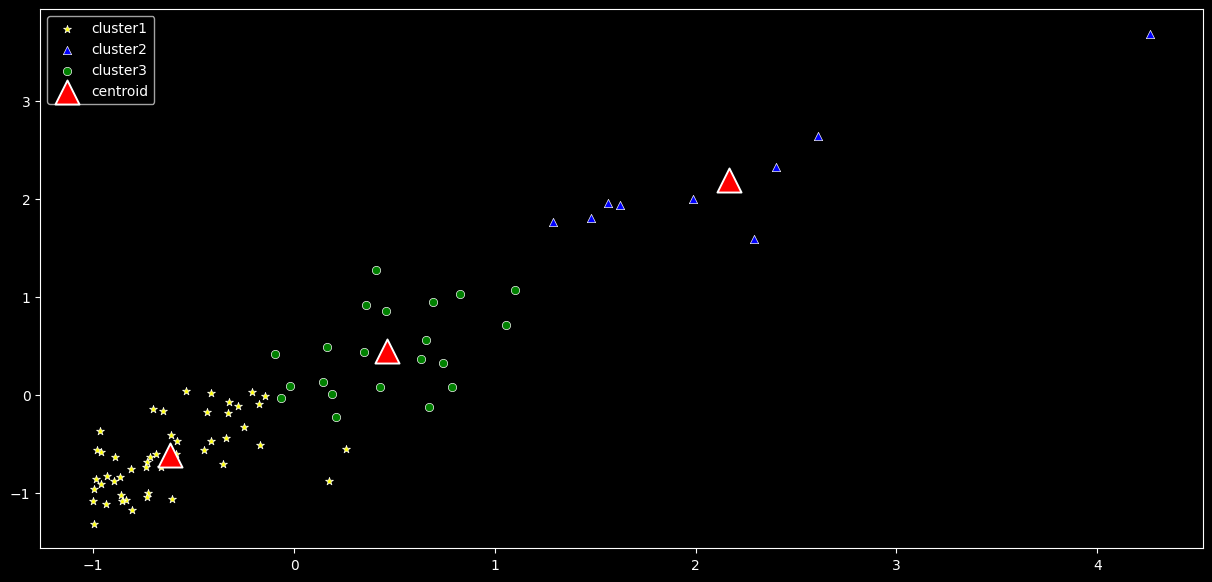

In [73]:
# figure size
plt.figure(figsize=(15,7))
# 3 clusters
sns.scatterplot(x=x[kmeans==0,0],y=x[kmeans==0,1], color='yellow',label='cluster1',marker='*')
sns.scatterplot(x=x[kmeans==1,0],y=x[kmeans==1,1], color='blue',label='cluster2',marker='^')
sns.scatterplot(x=x[kmeans==2,0],y=x[kmeans==2,1], color='green',label='cluster3',marker='o')
# to display the clusters on graph
sns.scatterplot(x=clusters.cluster_centers_[0:3,0],y=clusters.cluster_centers_[0:3,1],color='red',
                label='centroid',s=300,marker='^')

In [74]:
clusters.cluster_centers_[0:3,0]

array([-0.61807843,  2.16689307,  0.4620785 ])

In [75]:
clusters.cluster_centers_[0:3,1]

array([-0.61323057,  2.18622171,  0.44359419])

In [76]:
df[df['clusters']==0]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience,clusters
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,0
10,TM Dilshan (SL),330,303,41,10290,161,39.27,11933,86.23,22,47,11,17,0
11,Mohammad Yousuf (Asia/PAK),288,273,40,9720,141,41.71,12942,75.10,15,64,15,12,0
12,AC Gilchrist (AUS/ICC),287,279,11,9619,172,35.89,9922,96.94,16,55,19,12,0
13,MS Dhoni (Asia/INDIA),295,255,70,9496,183,51.32,10706,88.69,10,64,8,13,0
14,M Azharuddin (INDIA),334,308,54,9378,153,36.92,12669,74.02,7,58,9,15,0
15,AB de Villiers (Afr/SA),222,213,39,9319,162,53.55,9295,100.25,24,53,7,12,0
16,PA de Silva (SL),308,296,30,9284,145,34.90,11443,81.13,11,64,17,19,0
17,CH Gayle (ICC/WI),269,264,17,9221,215,37.33,10834,85.11,22,47,23,16,0
18,Saeed Anwar (PAK),247,244,19,8824,194,39.21,10938,80.67,20,43,15,14,0


In [77]:
df[df['clusters']==1]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience,clusters
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,1
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,1
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,1
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,1
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,1
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137,39.52,15812,74.24,10,83,20,16,1
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139,44.36,15885,72.89,17,86,17,18,1
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,1
8,R Dravid (Asia/ICC/INDIA),344,318,40,10889,153,39.16,15284,71.24,12,83,13,15,1


In [78]:
df[df['clusters']==2]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience,clusters
25,V Kohli (INDIA),188,180,29,8146,183,53.94,8952,90.99,27,43,11,9,2
34,HM Amla (SA),156,153,10,7186,159,50.25,8069,89.05,25,33,3,9,2
36,NJ Astle (NZ),223,217,14,7090,145,34.92,9760,72.64,16,41,19,12,2
37,GC Smith (Afr/SA),197,194,10,6989,141,37.98,8648,80.81,10,47,8,11,2
38,MG Bevan (AUS),232,196,67,6912,108,53.58,9320,74.16,6,46,5,10,2
39,G Kirsten (SA),185,185,19,6798,188,40.95,9436,72.04,13,45,11,10,2
40,A Flower (ZIM),213,208,16,6786,145,35.34,9097,74.59,4,55,13,11,2
42,IVA Richards (WI),187,167,24,6721,189,47.00,7451,90.20,11,45,7,16,2
46,LRPL Taylor (NZ),190,176,29,6486,131,44.12,7906,82.03,17,37,9,11,2
47,RB Richardson (WI),224,217,30,6248,122,33.41,9801,63.74,5,44,8,13,2
